<a href="https://colab.research.google.com/github/somkiatth/git/blob/master/bidirectional_lstm_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bidirectional LSTM on IMDB



# **Bi-LSTM:(Bi-directional long short term memory):**



Bidirectional recurrent neural networks(RNN) are really just putting two independent RNNs together This structure allows the networks to have both backward and forward information about the sequence at every time step. Using bidirectional will run your inputs in two ways, one from past to future and one from future to past and what differs this approach from unidirectional is that in the LSTM that runs backward you preserve information from the future and using the two hidden states combined you are able in any point in time to preserve information from both past and future.

# **Architecture of BiLSTM**
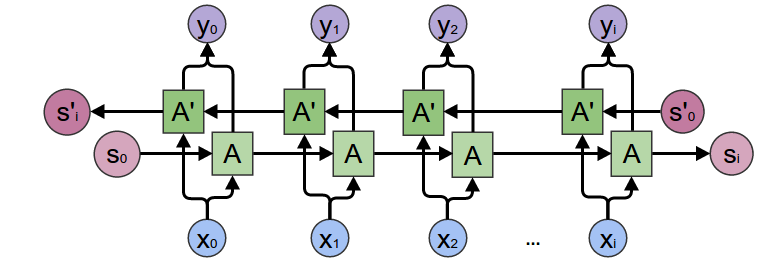


What they are suited for is a very complicated question but BiLSTMs show very good results as they can understand the context better, I will try to explain through an example.

Let's say we try to predict the next word in a sentence, on a high level what a unidirectional LSTM will see is

“The boys went to ….”

And will try to predict the next word only by this context, with bidirectional LSTM you will be able to see information further down the road for example

Forward LSTM:

“The boys went to …”

Backward LSTM:

“… and then they got out of the pool”

You can see that using the information from the future it could be easier for the network to understand what the next word is.
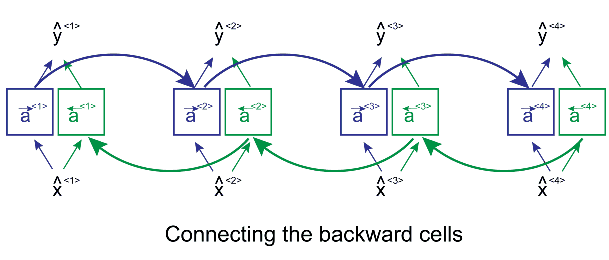



Here we apply forward propagation 2 times , one for the forward cells and one for the backward cells

Both activations(forward , backward) would be considered to calculate the output y^ at time t.

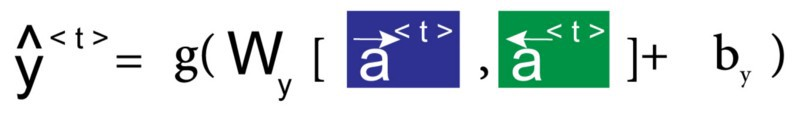

## Setup

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

max_features = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review


## Build the model

In [ ]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,757,761
Trainable params: 2,757,761
Non-train

## Load the IMDB movie review sentiment data

In [ ]:
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(
    num_words=max_features
)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)


17473536/17464789 [==============================] - 0s 0us/step
25000 Training sequences
25000 Validation sequences


## Train and evaluate the model

In [ ]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=32, epochs=1, validation_data=(x_val, y_val))


782/782 [==============================] - 511s 643ms/step - loss: 0.2028 - accuracy: 0.9232 - val_loss: 0.3508 - val_accuracy: 0.8503
